## Loading data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-02 04:08:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.64.91, 142.250.80.123, 142.250.176.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.64.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  39.4MB/s    in 1.7s    

2024-11-02 04:08:19 (39.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [ ]:
from PIL import Image
import numpy as np

# Training
x_train = []
y_train = []

cats_dir = os.path.join(train_dir, "cats")
dogs_dir = os.path.join(train_dir, "dogs")

for i, cat_file in enumerate(os.listdir(cats_dir)):
  im = Image.open(os.path.join(cats_dir, cat_file)).convert("RGB")
  im_resized = im.resize((150, 150))
  x_train.append(np.array(im_resized))
  y_train.append(1)

for i, dog_file in enumerate(os.listdir(dogs_dir)):
  im = Image.open(os.path.join(dogs_dir, dog_file)).convert("RGB")
  im_resized = im.resize((150, 150))
  x_train.append(np.array(im_resized))
  y_train.append(0)

x_train = np.array(x_train)
y_train = np.array(y_train)

# Validation
x_val = []
y_val = []

cats_dir = os.path.join(validation_dir, "cats")
dogs_dir = os.path.join(validation_dir, "dogs")

for i, cat_file in enumerate(os.listdir(cats_dir)):
  im = Image.open(os.path.join(cats_dir, cat_file)).convert("RGB")
  im_resized = im.resize((150, 150))
  x_val.append(np.array(im_resized))
  y_val.append(1)

for i, dog_file in enumerate(os.listdir(dogs_dir)):
  im = Image.open(os.path.join(dogs_dir, dog_file)).convert("RGB")
  im_resized = im.resize((150, 150))
  x_val.append(np.array(im_resized))
  y_val.append(0)

x_val = np.array(x_val)
y_val = np.array(y_val)

(2000, 150, 150, 3) (2000,)


## Defining the Model

In [7]:
import tensorflow as tf

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)

pretrained_model.trainable = False

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(pretrained_model.output)
model = tf.keras.Model(pretrained_model.input, output_layer)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

## Fine-Tuning

Epoch 1/5


I0000 00:00:1730521117.478823   11249 service.cc:148] XLA service 0x7f5fb004a360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730521117.478900   11249 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-02 04:18:37.631263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730521118.445504   11249 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-02 04:18:41.784544: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.3 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 3/63 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5208 - loss: 0.72426

I0000 00:00:1730521122.350972   11249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.8009 - loss: 0.3880 - val_accuracy: 0.9580 - val_loss: 0.1234
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9595 - loss: 0.1120 - val_accuracy: 0.9540 - val_loss: 0.1146
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9662 - loss: 0.0993 - val_accuracy: 0.9600 - val_loss: 0.1049
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9728 - loss: 0.0844 - val_accuracy: 0.9650 - val_loss: 0.1036
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9718 - loss: 0.0864 - val_accuracy: 0.9620 - val_loss: 0.0977


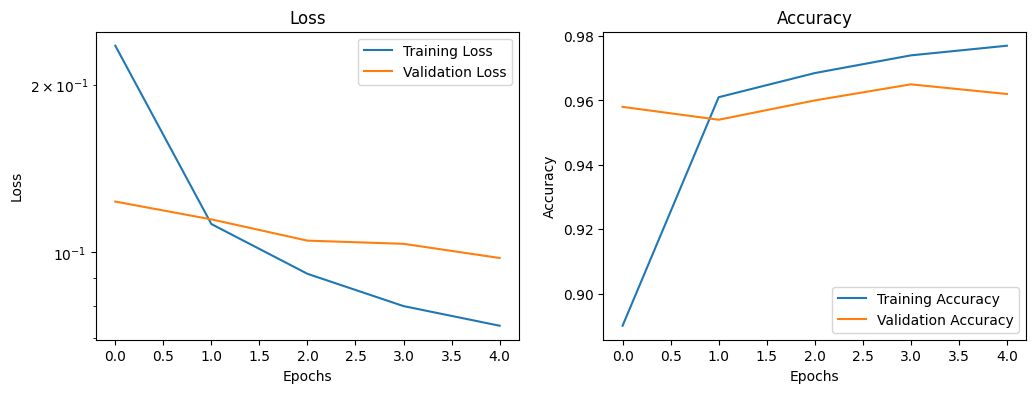

In [8]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Plotting the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

96% Accuracy!

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


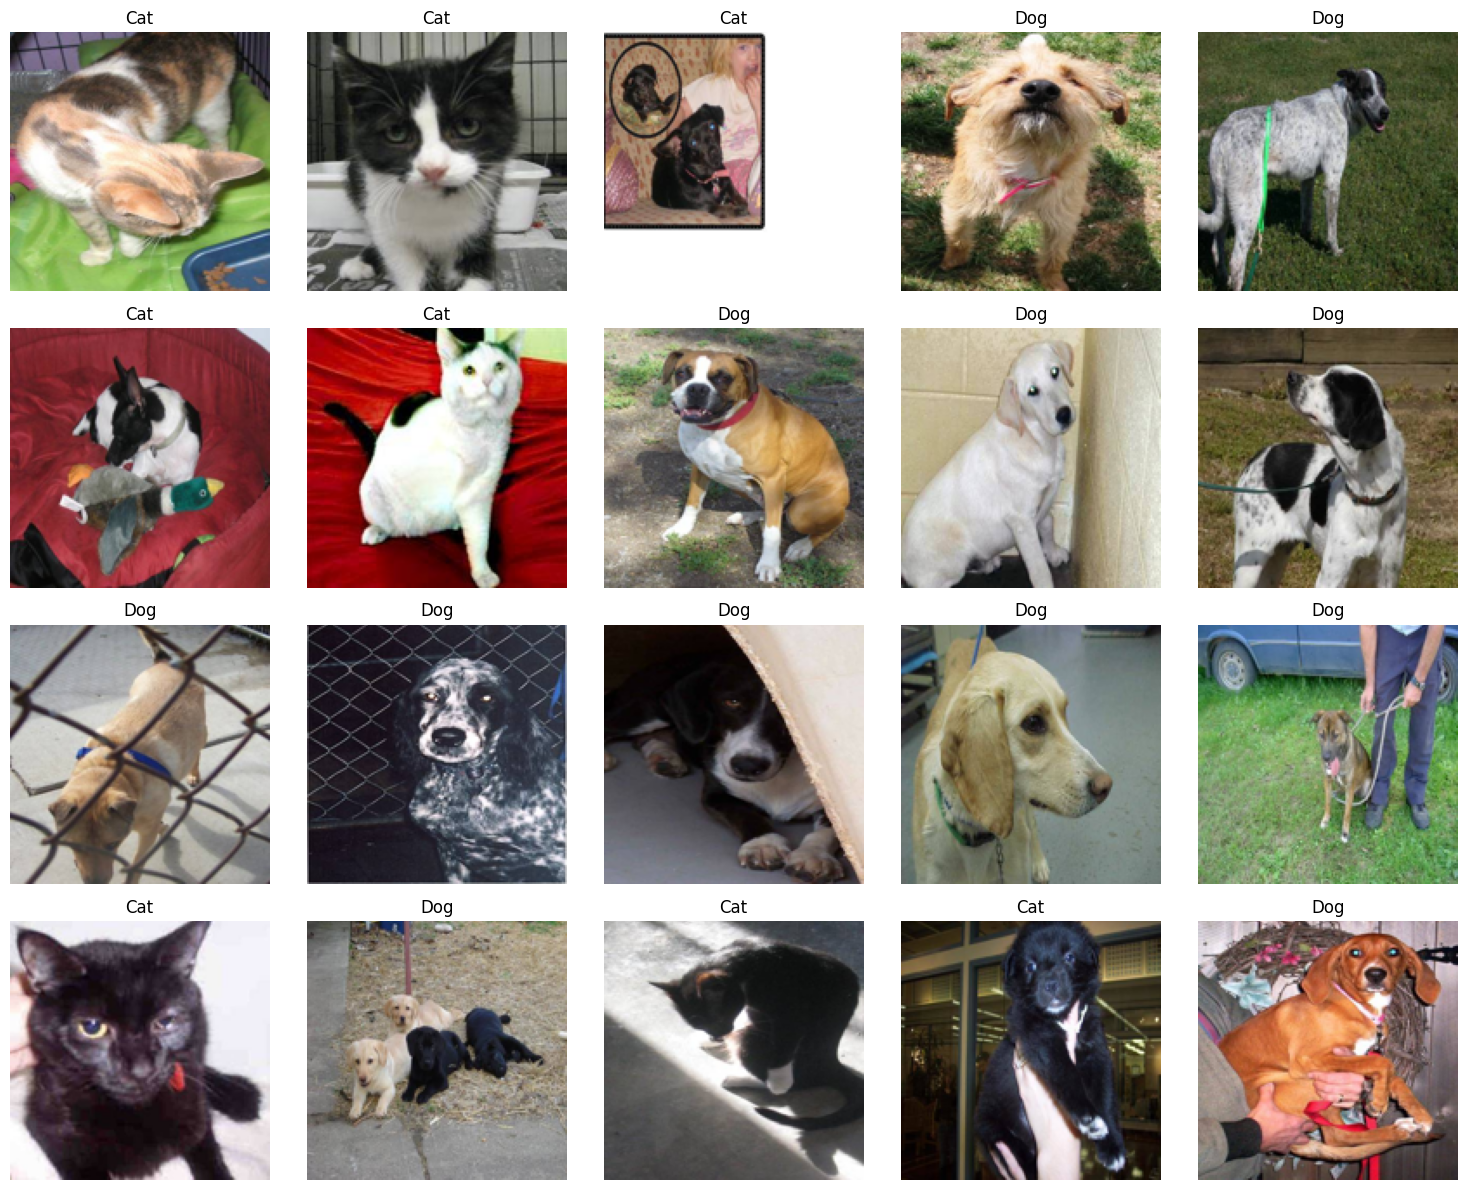

In [17]:
import random
import matplotlib.pyplot as plt

# Get 20 random images from the validation set, display them, and make predictions

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

random_indices = [random.randint(0, len(x_val) - 1) for _ in range(20)]
random_images = x_val[random_indices]

for ax, random_image in zip(axes, random_images):
    ax.imshow(random_image)
    ax.axis('off')

random_images_expanded = np.array([np.expand_dims(img, axis=0) for img in random_images])
predictions = model.predict(np.vstack(random_images_expanded))

for ax, prediction in zip(axes, predictions):
    if prediction > 0.5:
        ax.set_title("Cat")
    else:
        ax.set_title("Dog")

plt.tight_layout()
plt.show()